In [59]:
# Import needed packages
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd
import rioxarray as rxr
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import matplotlib.patches as mpatches


from matplotlib_scalebar.scalebar import ScaleBar


## Open the vector polygon data of the NYC NTA and Borough Boundaries

In [60]:
# Neighborhood 
nta = gpd.read_file('../data/2010 Neighborhood Tabulation Areas (NTAs)/geo_export_65077844-70de-4bb7-91ce-729f59546bad.shp')
nta.crs

nta.to_crs(epsg=6347, inplace=True)
print(nta.crs)

# Borough
boro = gpd.read_file("../data/Borough Boundaries/geo_export_da053023-9b69-4e71-bbff-eb976f919a31.shp")

boro.to_crs(epsg=6347, inplace=True)
print(boro.crs)


EPSG:6347
EPSG:6347


## PLOT ALL AFFORDABLE

In [61]:
# KDE Shapefile
kde = gpd.read_file('../data/L1/all_affordable_housing_kde_contours.shp').to_crs(6347)
print(kde.crs) # already in correct crs

# subset layers
cont50 = kde[kde['contlabel'] == '50']
cont25 = kde[kde['contlabel'] == '25']
cont75 = kde[kde['contlabel'] == '75']

# Raster
file_name = '../data/L1/KDE_allaffordable_1ha_scaled_match.tiff'

r = rxr.open_rasterio(file_name, masked=True)
data_plotting_extent = plotting_extent(r[0], r.rio.transform())


# Create a mask to see which neighborhoods fall within certain kde contours
nta_25 = gpd.sjoin(nta, cont25, predicate = 'intersects')
nta_50 = gpd.sjoin(nta, cont50, predicate = 'intersects')
nta_75 = gpd.sjoin(nta, cont75, predicate = 'intersects')


epsg:6347


### CONTOURS of Kernel Density Estimates
the smallest region which contains the respective probability mass (e.g. 25%, 50%, 75%)

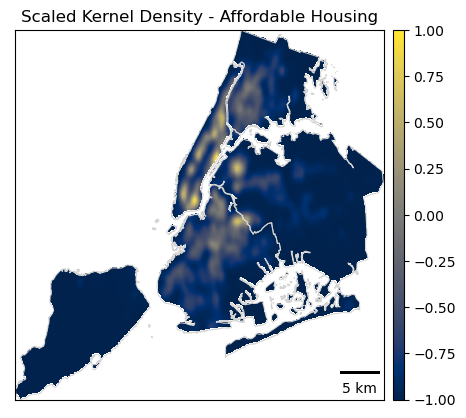

In [62]:
# Define color ramp for housing kernel density
color_ramp = 'cividis'


# Plot uncropped array
f, ax = plt.subplots()


boro.boundary.plot(ax=ax, color = "lightgrey", lw = 0.75)

ep.plot_bands(r.values,
              cmap = color_ramp,
            ax=ax,
            title="Scaled Kernel Density - Affordable Housing",
            extent=data_plotting_extent)  # Use plotting extent from DatasetReader object



# Scale bar
ax.add_artist(ScaleBar(dx=1, location = 'lower right'))

plt.savefig('../figs/affordable_housing_raster_0.png', dpi = 300,  bbox_inches='tight')
plt.show()

In [63]:
data_plotting_extent

(563000.0, 609800.0, 4483100.0, 4530000.0)

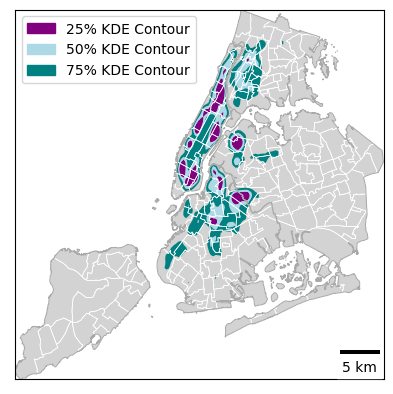

In [64]:
# Plot Neighborhoods with Kernel Density Contours
f, ax = plt.subplots()


# Set extent to match raster extent
plt.xlim(data_plotting_extent[0], data_plotting_extent[1])
plt.ylim(data_plotting_extent[2], data_plotting_extent[3])

nta.plot(ax=ax, color = "lightgrey")
nta.boundary.plot(ax=ax, color = "white", lw = 0.5)

boro.boundary.plot(ax=ax, color = "darkgray", lw = 0.75)

#nta_25.plot(ax=ax, color = "purple")
#nta_50.plot(ax=ax, color = "lightblue")
#nta_75.plot(ax=ax, color = "teal")


cont25.plot(ax=ax, color = "purple", lw = 1)
cont50.plot(ax=ax, color = "lightblue", lw = 1)
cont75.plot(ax=ax, color = "teal", lw = 1)

# Scale bar
ax.add_artist(ScaleBar(dx=1, location = 'lower right'))
# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])



# Add Legend
purple_patch = mpatches.Patch(color='purple', label='25% KDE Contour')
lb_patch = mpatches.Patch(color='lightblue', label='50% KDE Contour')
teal_patch = mpatches.Patch(color='teal', label='75% KDE Contour')

plt.legend(handles=[purple_patch, lb_patch, teal_patch], loc = 'upper left')


plt.savefig('../figs/affordable_housing_kdecont_0.png', dpi = 300, bbox_inches='tight')
plt.show()


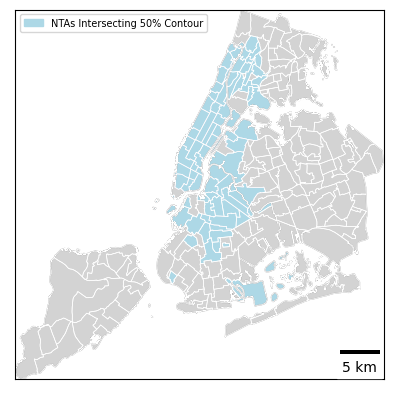

In [36]:
# Plot Neighborhoods with That Contain Kernel Density Contours
f, ax = plt.subplots()

# Set extent to match raster extent
plt.xlim(data_plotting_extent[0], data_plotting_extent[1])
plt.ylim(data_plotting_extent[2], data_plotting_extent[3])

# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])


# Add boro and NTA boundary plots
boro.boundary.plot(ax=ax, color = "darkgray", lw = 0.75)
nta.plot(ax=ax, color = "lightgrey")
nta.boundary.plot(ax=ax, color = "white", lw = 0.5)

# Add the NTAS associated with the corresponding kernel contour
nta_25.plot(ax=ax, color = "purple")
nta_50.plot(ax=ax, color = "lightblue")
#nta_75.plot(ax=ax, color = "teal")

# Scale bar
ax.add_artist(ScaleBar(dx=1, location = 'lower right'))

# Add Legend
purple_patch = mpatches.Patch(color='purple', label='NTAs Intersecting 25% Contour')
lb_patch = mpatches.Patch(color='lightblue', label='NTAs Intersecting 50% Contour')
teal_patch = mpatches.Patch(color='teal', label='NTAs Intersecting 75% Contour')

#plt.legend(handles=[purple_patch], loc = 'upper left', fontsize = "7")
plt.legend(handles=[lb_patch], loc = 'upper left', fontsize = "7")
#plt.legend(handles=[lb_patch, teal_patch], loc = 'upper left', fontsize = "7")


plt.savefig('../figs/affordable_housing_kdecont_contain_nta_1.png', dpi = 300, bbox_inches='tight')
plt.show()

# PLOT SUBSET OF SUBSIDIZED

epsg:6347


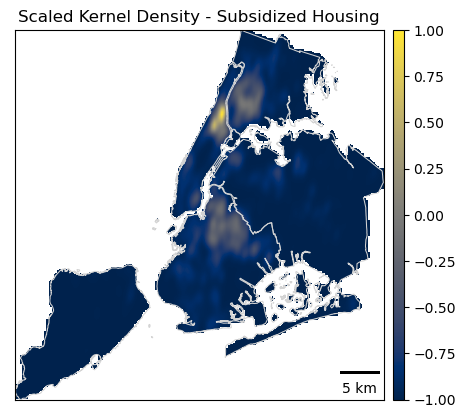

In [37]:
# Define color ramp for housing kernel density
color_ramp = 'cividis'
# KDE Shapefile
kde = gpd.read_file('../data/L1/subsidized_kde_contours.shp').to_crs(6347)
print(kde.crs) # already in correct crs

# subset layers
cont50 = kde[kde['contlabel'] == '50']
cont25 = kde[kde['contlabel'] == '25']
cont75 = kde[kde['contlabel'] == '75']

# Raster
file_name = '../data/L1/KDE_subsidized_1ha_scaled.tiff'

r = rxr.open_rasterio(file_name, masked=True)
data_plotting_extent = plotting_extent(r[0], r.rio.transform())


# Create a mask to see which neighborhoods fall within certain kde contours
nta_25 = gpd.sjoin(nta, cont25, predicate = 'intersects')
nta_50 = gpd.sjoin(nta, cont50, predicate = 'intersects')
nta_75 = gpd.sjoin(nta, cont75, predicate = 'intersects')

# Define color ramp for housing kernel density
color_ramp = 'cividis'


# Plot uncropped array
f, ax = plt.subplots()


boro.boundary.plot(ax=ax, color = "lightgrey", lw = 0.75)

ep.plot_bands(r.values,
              cmap = color_ramp,
            ax=ax,
            title="Scaled Kernel Density - Subsidized Housing",
            extent=data_plotting_extent)  # Use plotting extent from DatasetReader object



# Scale bar
ax.add_artist(ScaleBar(dx=1, location = 'lower right'))

plt.savefig('../figs/subsidized_housing_raster_0.png', dpi = 300,  bbox_inches='tight')
plt.show()

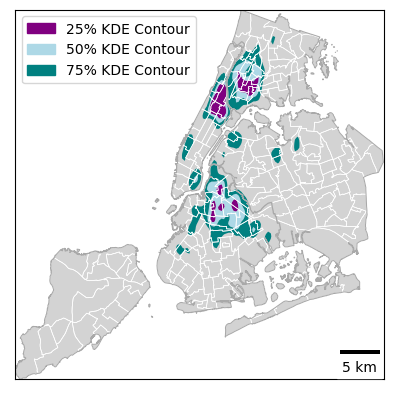

In [38]:
# Plot Neighborhoods with Kernel Density Contours
f, ax = plt.subplots()


# Set extent to match raster extent
plt.xlim(data_plotting_extent[0], data_plotting_extent[1])
plt.ylim(data_plotting_extent[2], data_plotting_extent[3])

nta.plot(ax=ax, color = "lightgrey")
nta.boundary.plot(ax=ax, color = "white", lw = 0.5)

boro.boundary.plot(ax=ax, color = "darkgray", lw = 0.75)

#nta_25.plot(ax=ax, color = "purple")
#nta_50.plot(ax=ax, color = "lightblue")
#nta_75.plot(ax=ax, color = "teal")


cont25.plot(ax=ax, color = "purple", lw = 1)
cont50.plot(ax=ax, color = "lightblue", lw = 1)
cont75.plot(ax=ax, color = "teal", lw = 1)

# Scale bar
ax.add_artist(ScaleBar(dx=1, location = 'lower right'))
# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])



# Add Legend
purple_patch = mpatches.Patch(color='purple', label='25% KDE Contour')
lb_patch = mpatches.Patch(color='lightblue', label='50% KDE Contour')
teal_patch = mpatches.Patch(color='teal', label='75% KDE Contour')

plt.legend(handles=[purple_patch, lb_patch, teal_patch], loc = 'upper left')


plt.savefig('../figs/subsidized_housing_kdecont_0.png', dpi = 300, bbox_inches='tight')
plt.show()

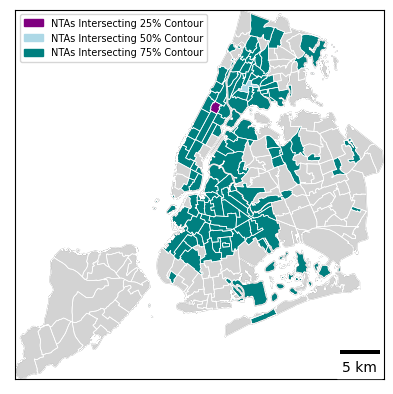

In [43]:
# Plot Neighborhoods with That Contain Kernel Density Contours
f, ax = plt.subplots()

# Set extent to match raster extent
plt.xlim(data_plotting_extent[0], data_plotting_extent[1])
plt.ylim(data_plotting_extent[2], data_plotting_extent[3])

# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])


# Add boro and NTA boundary plots
boro.boundary.plot(ax=ax, color = "darkgray", lw = 0.75)
nta.plot(ax=ax, color = "lightgrey")
nta.boundary.plot(ax=ax, color = "white", lw = 0.5)

# Add the NTAS associated with the corresponding kernel contour
nta_25.plot(ax=ax, color = "purple")
nta_50.plot(ax=ax, color = "lightblue")
nta_75.plot(ax=ax, color = "teal")

# Scale bar
ax.add_artist(ScaleBar(dx=1, location = 'lower right'))

# Add Legend
purple_patch = mpatches.Patch(color='purple', label='NTAs Intersecting 25% Contour')
lb_patch = mpatches.Patch(color='lightblue', label='NTAs Intersecting 50% Contour')
teal_patch = mpatches.Patch(color='teal', label='NTAs Intersecting 75% Contour')

#plt.legend(handles=[purple_patch], loc = 'upper left', fontsize = "7")
#plt.legend(handles=[purple_patch,lb_patch], loc = 'upper left', fontsize = "7")
plt.legend(handles=[purple_patch,lb_patch, teal_patch], loc = 'upper left', fontsize = "7")


plt.savefig('../figs/subsidized_housing_kdecont_contain_nta_2.png', dpi = 300, bbox_inches='tight')
plt.show()

# PLOT Rent Regulated

In [50]:
# KDE Shapefile
kde = gpd.read_file('../data/L1/rent_stabilized_kde_contours.shp').to_crs(6347)
print(kde.crs) # already in correct crs

# subset layers
cont50 = kde[kde['contlabel'] == '50']
cont25 = kde[kde['contlabel'] == '25']
cont75 = kde[kde['contlabel'] == '75']

# Raster
file_name = '../data/L1/KDE_RentStabilized_1ha_scaled.tiff'

# Define plotting extent
r = rxr.open_rasterio(file_name, masked=True)
data_plotting_extent = plotting_extent(r[0], r.rio.transform())


# Create a mask to see which neighborhoods fall within certain kde contours
nta_25 = gpd.sjoin(nta, cont25, predicate = 'intersects')
nta_50 = gpd.sjoin(nta, cont50, predicate = 'intersects')
nta_75 = gpd.sjoin(nta, cont75, predicate = 'intersects')


epsg:6347


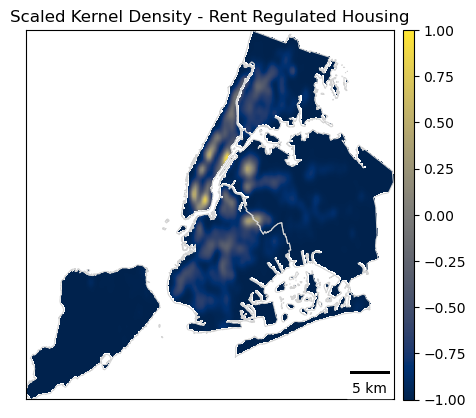

In [51]:
# Define color ramp for housing kernel density
color_ramp = 'cividis'

# Plot uncropped array
f, ax = plt.subplots()


boro.boundary.plot(ax=ax, color = "lightgrey", lw = 0.75)

ep.plot_bands(r.values,
              cmap = color_ramp,
            ax=ax,
            title="Scaled Kernel Density - Rent Regulated Housing",
            extent=data_plotting_extent)  # Use plotting extent from DatasetReader object



# Scale bar
ax.add_artist(ScaleBar(dx=1, location = 'lower right'))

plt.savefig('../figs/rent_regulated_housing_raster_0.png', dpi = 300,  bbox_inches='tight')
plt.show()

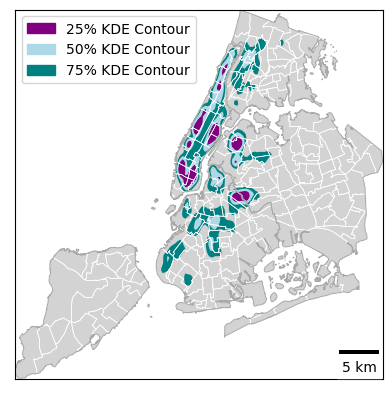

In [52]:
# Plot Neighborhoods with Kernel Density Contours
f, ax = plt.subplots()


# Set extent to match raster extent
plt.xlim(data_plotting_extent[0], data_plotting_extent[1])
plt.ylim(data_plotting_extent[2], data_plotting_extent[3])

nta.plot(ax=ax, color = "lightgrey")
nta.boundary.plot(ax=ax, color = "white", lw = 0.5)

boro.boundary.plot(ax=ax, color = "darkgray", lw = 0.75)

#nta_25.plot(ax=ax, color = "purple")
#nta_50.plot(ax=ax, color = "lightblue")
#nta_75.plot(ax=ax, color = "teal")


cont25.plot(ax=ax, color = "purple", lw = 1)
cont50.plot(ax=ax, color = "lightblue", lw = 1)
cont75.plot(ax=ax, color = "teal", lw = 1)

# Scale bar
ax.add_artist(ScaleBar(dx=1, location = 'lower right'))
# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])



# Add Legend
purple_patch = mpatches.Patch(color='purple', label='25% KDE Contour')
lb_patch = mpatches.Patch(color='lightblue', label='50% KDE Contour')
teal_patch = mpatches.Patch(color='teal', label='75% KDE Contour')

plt.legend(handles=[purple_patch, lb_patch, teal_patch], loc = 'upper left')


plt.savefig('../figs/rent_regulated_housing_kdecont_0.png', dpi = 300, bbox_inches='tight')
plt.show()

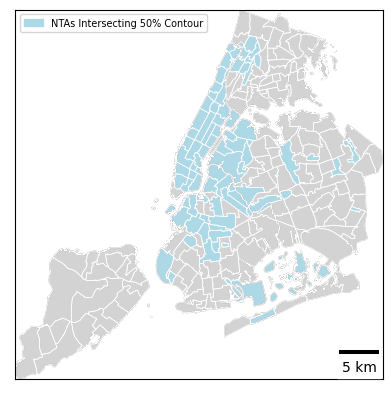

In [58]:
# Plot Neighborhoods with That Contain Kernel Density Contours
f, ax = plt.subplots()

# Set extent to match raster extent
plt.xlim(data_plotting_extent[0], data_plotting_extent[1])
plt.ylim(data_plotting_extent[2], data_plotting_extent[3])

# Hide X and Y axes label marks
ax.xaxis.set_tick_params(labelbottom=False)
ax.yaxis.set_tick_params(labelleft=False)

# Hide X and Y axes tick marks
ax.set_xticks([])
ax.set_yticks([])


# Add boro and NTA boundary plots
boro.boundary.plot(ax=ax, color = "darkgray", lw = 0.75)
nta.plot(ax=ax, color = "lightgrey")
nta.boundary.plot(ax=ax, color = "white", lw = 0.5)

# Add the NTAS associated with the corresponding kernel contour
nta_25.plot(ax=ax, color = "purple")
nta_50.plot(ax=ax, color = "lightblue")
#nta_75.plot(ax=ax, color = "teal")

# Scale bar
ax.add_artist(ScaleBar(dx=1, location = 'lower right'))

# Add Legend
purple_patch = mpatches.Patch(color='purple', label='NTAs Intersecting 25% Contour')
lb_patch = mpatches.Patch(color='lightblue', label='NTAs Intersecting 50% Contour')
teal_patch = mpatches.Patch(color='teal', label='NTAs Intersecting 75% Contour')

#plt.legend(handles=[purple_patch], loc = 'upper left', fontsize = "7")
plt.legend(handles=[lb_patch], loc = 'upper left', fontsize = "7")
#plt.legend(handles=[lb_patch, teal_patch], loc = 'upper left', fontsize = "7")


plt.savefig('../figs/rent_regulated_housing_kdecont_contain_nta_1.png', dpi = 300, bbox_inches='tight')
plt.show()